# Аппроксимация функции методом наименьших квадратов

In [22]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from numpy import genfromtxt
import sys
import math
import pandas as pd
from IPython.display import display, HTML
import matplotlib.lines as mlines
from matplotlib.pyplot import figure

In [23]:
def in_float(s = 'Введите число', integer = False):
    flag = True
    while flag:
        flag = False
        try:
            if integer:
                val = int(input(s +': '))
            else:
                val = float(input(s +': '))
        except ValueError:
            flag = True
            print('Попробуйте снова!\n')
    return val

def parse():
    flag = True
    while flag:
        path = input('Введи путь:\n').strip()
        try:
            a = genfromtxt(path, delimiter=',')
            if True in np.isnan(a) or a.shape[0] != 2:
                raise ValueError
            return a   
        except ValueError:
            print('В файле должно быть 2 строчки, в каждой одинаковое количество чисел\n')
        except OSError:
            print('Такого файла нет.\n')
        print('Попробуйте снова!\n')

def input_vals():
    n = in_float(s = 'Введите количество точек', integer = True)
    print()
    a = []
    for i in range(int(n)):
        a.append([in_float('x'), in_float('y')])
        print()
    return np.array(a).transpose()

def to_df(array, f, eps, f_type = 'f'):
    np_arr = np.concatenate((array, [f], [eps]), axis=0)
    return pd.DataFrame(data=np_arr, index=["X", "Y", f_type, 'eps'])


def newline(p1, p2, color = 'black'):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color = color)
    ax.add_line(l)
    return l

In [42]:
from math import sqrt

def cof_cor(Xs, Ys):
    X_mean = np.mean(Xs)
    Y_mean = np.mean(Ys)
    chislitel = 0
    znamenatel_x = 0
    znamenatel_y = 0
    for x, y in zip(Xs, Ys):
        chislitel += (x-X_mean)*(y-Y_mean)
        znamenatel_x += (x-X_mean) ** 2
        znamenatel_y += (y-Y_mean) ** 2
    return chislitel / sqrt(znamenatel_x * znamenatel_y)

def linear_approx(Xs, Ys):
    print('\n\n\n')
    A = np.array([[sum(Xs ** 2), sum(Xs)], 
                  [sum(Xs), len(Xs)]])
    B = np.array([sum(Xs*Ys), sum(Ys)])
    a, b = np.linalg.solve(A, B)
    return a, b

def linear(array):
    Xs = array[0]
    Ys = array[1]
    a, b = linear_approx(Xs, Ys)
    print(f'Correlation coefficient = {cof_cor(Xs, Ys)}')
    f = a * Xs + b
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    S = sum(eps ** 2)
    print(f'\n\nLinear approximate\nf = {a} * x + {b}')
    display(to_df(array, f, eps, f_type = 'f=ax+b'))
    print(f'S = {S}')
    print(f'delta = {delta}\n\n')
    return a, b, '-', S, delta

def squared_approx(Xs, Ys):
    A = np.array([[len(Xs),  sum(Xs),sum(Xs ** 2)],
                  [ sum(Xs),sum(Xs ** 2),sum(Xs ** 3)],
                  [sum(Xs ** 2),sum(Xs ** 3),sum(Xs ** 4)]])
    B = np.array([sum(Ys), sum(Xs*Ys), sum((Xs**2)*Ys)])
    c, b, a = np.linalg.solve(A, B)
    return a, b, c

def squared(array):
    Xs = array[0]
    Ys = array[1]
    a, b, c = squared_approx(Xs, Ys)
    f = a * Xs ** 2 + b * Xs + c
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    S = sum(eps ** 2)
    print(f'\n\nSquared approximate\nf = {a} * x^2 + {b} * x +{c}')
    display(to_df(array, f, eps, f_type = 'f=ax**2+bx+c'))
    print(f'S = {S}')
    print(f'delta = {delta}\n\n')
    return a, b, c, S, delta

def power(array):
    Xs = array[0]
    Ys = array[1]
    log_Xs = np.log(Xs)
    log_Ys = np.log(Ys)
    if True in np.isnan(log_Xs) or True in np.isnan(log_Ys):
        raise ValueError
    print(log_Xs, log_Ys)
    b, a = linear_approx(log_Xs, log_Ys)
    a = np.exp(a)
    f = a * (Xs ** b)
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    S = sum(eps ** 2)
    print(f'\n\nPower approximate\nf = {a} * x ** {b}')
    display(to_df(array, f, eps, f_type = 'f=ax**b'))
    print(f'S = {S}')
    print(f'delta = {delta}\n\n')
    return a, b, '-', S, delta

def exponential(array):
    Xs = array[0]
    Ys = array[1]
    log_Ys = np.log(Ys)
    if True in np.isnan(log_Ys):
        raise ValueError
    b, a = linear_approx(Xs, log_Ys)
    a = np.exp(a)
    f = a * (np.exp(Xs * b))
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    S = sum(eps ** 2)
    print(f'\n\nExponential approximate\nf = {a} * e**(x * {b})')
    display(to_df(array, f, eps, f_type = 'f = ae**(bx)'))
    print(f'S = {S}')
    print(f'delta = {delta}\n\n')
    return a, b, '-', S, delta

def logarithm(array):
    Xs = array[0]
    Ys = array[1]
    log_Xs = np.log(Xs)
    if True in np.isnan(log_Xs):
        raise ValueError
    a, b = linear_approx(log_Xs, Ys)
    f = a * (log_Xs) + b
    eps = Ys - f
    delta = (sum(eps ** 2) / len(Xs)) ** 0.5
    S = sum(eps ** 2)
    print(f'\n\nLogarithm approximate\nf = {a} * ln(x) + {b}')
    display(to_df(array, f, eps, f_type = 'f = a * ln(x) + b'))
    print(f'S = {S}')
    print(f'delta = {delta}\n\n')
    return a, b, '-', S, delta

In [43]:
def run():
#     np.set_printoptions(precision=3)

    figure(figsize=(7, 7))
    again = True
    print('Добрый день! Будем аппроксимировать, используя МНК\n')
    while again:
        again = False
        in_type = input('Введи:\n\t* k - если хочешь вводить с клавиатуры\n\t* f - если хочешь вводить из файла\n')
        if in_type.strip() == 'k':
            array = input_vals()
        elif in_type.strip() == 'f':
            array = parse()
        else:
            print('Введено неверно, попробуй снова.')
            again = True
    print('Данные с которыми работаем:')
    plt.scatter(array[0], array[1], marker='+', c='g')
    plt.plot()
    plt.show()
    linear_coeff = linear(array)
    squared_coeff = squared(array)
    p, e, l = True, True, True
    
    try:
        power_coeff = power(array)
    except ValueError:
        p=False
        print('Невозможно применить аппроксимацию степенной функцией из-за ОДЗ логарифма.')
    
    try:
        exponential_coeff = exponential(array)
    except ValueError:
        e = False
        print('Невозможно применить аппроксимацию экспоненциальной функцией из-за ОДЗ логарифма.')
    
    try:
        logarithm_coeff = logarithm(array)
    except ValueError:
        l = False
        print('Невозможно применить аппроксимацию логарифмической функцией из-за ОДЗ логарифма.')
    
    
    steps = 1000
    min_x = min(array[0])-1
    max_x = max(array[0])+1
    X = np.array([min_x+i*max_x/steps for i in range(steps)])
    Y_lin = linear_coeff[0] * X + linear_coeff[1]
    Y_sq = squared_coeff[0] * (X ** 2) + squared_coeff[1] * (X) + squared_coeff[2]
    
    answer = [linear_coeff, squared_coeff]
    labels = ['f = ax+b', 'f = ax**2+bx+c']
    if p:
        answer.append(power_coeff)
        labels.append('f=ax**b')
        Y_p = power_coeff[0]*(X**power_coeff[1])
    if e:
        answer.append(exponential_coeff)
        labels.append('f=ae**(bx)')
        Y_e = exponential_coeff[0] * np.exp(exponential_coeff[1]*X)
    if l:
        answer.append(logarithm_coeff)
        labels.append('f = a * ln(x) + b')
        Y_l = logarithm_coeff[0] * np.log(X) + logarithm_coeff[1]
    numpy_data = np.array(answer)
    df = pd.DataFrame(data=numpy_data, index=labels, columns=['a', 'b', 'c', 'Мера откл. S', 'Среднекв. откл. delta'])
    display(df)
    figure(figsize=(7, 7))
    plt.plot(X, Y_lin, 'r', label = 'linear')
    plt.plot(X, Y_sq, 'g', label = 'squared')
    plt.plot(X, Y_p, 'b', label = 'power')
    plt.plot(X, Y_e, 'black', label = 'exp')
    plt.plot(X, Y_l, 'brown', label = 'log')
    plt.scatter(array[0], array[1], c='r')
    plt.plot()
    # draw axes
    p1 = [0, 0]
    p2 = [10, 0]
    p3 = [0, -5]
    p4 = [0, 20]
    newline(p1,p2, color = 'black')
    newline(p3,p4, color = 'black')
    plt.legend()
    plt.show()
    

lab45_input/test.csv

Добрый день! Будем аппроксимировать, используя МНК

Введи:
	* k - если хочешь вводить с клавиатуры
	* f - если хочешь вводить из файла
f
Введи путь:
lab45_input/test.csv
Данные с которыми работаем:


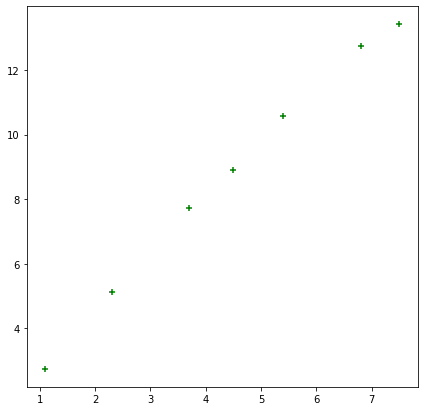





Correlation coefficient = 0.9974189309974396


Linear approximate
f = 1.685382768738333 * x + 1.2167884769271688


,0,1,2,3,4,5,6
X,1.10000,2.300000,3.700000,4.500000,5.400000,6.800000,7.500000
Y,2.73000,5.120000,7.740000,8.910000,10.590000,12.750000,13.430000
f=ax+b,3.07071,5.093169,7.452705,8.801011,10.317855,12.677391,13.857159
eps,-0.34071,0.026831,0.287295,0.108989,0.272145,0.072609,-0.427159


S = 0.4730197919445185
delta = 0.25995048757806566


Correlation coefficient = 1.0000000000000002


Squared approximate
f = -0.05885292462866666 * x^2 + 2.197385944878341 * x +0.3742599606650232


,0,1,2,3,4,5,6
X,1.100000,2.300000,3.700000,4.500000,5.400000,6.800000,7.500000
Y,2.730000,5.120000,7.740000,8.910000,10.590000,12.750000,13.430000
f=ax**2+bx+c,2.720172,5.116916,7.698891,9.070725,10.523993,12.595125,13.544178
eps,0.009828,0.003084,0.041109,-0.160725,0.066007,0.154875,-0.114178


S = 0.06900821293943496
delta = 0.09928905344601184


Correlation coefficient = 0.9977942347645435
[0.09531018 0.83290912 1.30833282 1.5040774  1.68639895 1.91692261
 2.01490302] [1.00430161 1.63315444 2.04640169 2.18717424 2.35991016 2.54553127
 2.59749101]






Power approximate
f = 2.5420901787906542 * x ** 0.8380361310314195


,0,1,2,3,4,5,6
X,1.100000,2.300000,3.700000,4.500000,5.400000,6.800000,7.500000
Y,2.730000,5.120000,7.740000,8.910000,10.590000,12.750000,13.430000
f=ax**b,2.753465,5.108953,7.609647,8.966163,10.446321,12.672535,13.757005
eps,-0.023465,0.011047,0.130353,-0.056163,0.143679,0.077465,-0.327005


S = 0.15439564547065057
delta = 0.1485143790396119


Correlation coefficient = 0.9991327838652162






Exponential approximate
f = 2.730945157340219 * e**(x * 0.2345504822290568)


,0,1,2,3,4,5,6
X,1.100000,2.300000,3.700000,4.50000,5.40000,6.800000,7.500000
Y,2.730000,5.120000,7.740000,8.91000,10.59000,12.750000,13.430000
f = ae**(bx),3.534788,4.683819,6.504437,7.84695,9.69122,13.458233,15.859622
eps,-0.804788,0.436181,1.235563,1.06305,0.89878,-0.708233,-2.429622


S = 10.70708985449173
delta = 1.2367636253251428


Correlation coefficient = 0.977339369824387






Logarithm approximate
f = 5.650037003535791 * ln(x) + 1.1988754276365257


,0,1,2,3,4,5,6
X,1.100000,2.300000,3.700000,4.500000,5.400000,6.800000,7.500000
Y,2.730000,5.120000,7.740000,8.910000,10.590000,12.750000,13.430000
f = a * ln(x) + b,1.737381,5.904843,8.591004,9.696968,10.727092,12.029559,12.583152
eps,0.992619,-0.784843,-0.851004,-0.786968,-0.137092,0.720441,0.846848


S = 4.199777952402653
delta = 0.7745761930983063


Correlation coefficient = 0.9624897745464995


,a,b,c,Мера откл. S,Среднекв. откл. delta
f = ax+b,1.685382768738333,1.2167884769271688,-,0.4730197919445185,0.25995048757806566
f = ax**2+bx+c,-0.05885292462866666,2.197385944878341,0.3742599606650232,0.06900821293943496,0.09928905344601184
f=ax**b,2.5420901787906542,0.8380361310314195,-,0.15439564547065057,0.1485143790396119
f=ae**(bx),2.730945157340219,0.2345504822290568,-,10.70708985449173,1.2367636253251428
f = a * ln(x) + b,5.650037003535791,1.1988754276365257,-,4.199777952402653,0.7745761930983063


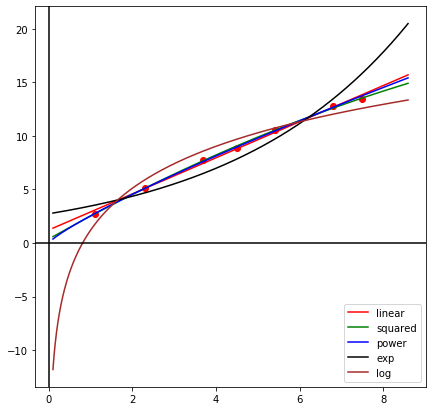

In [44]:
run()